## Régression logistique 

### Introduction <a class="anchor" id="intro"></a>

L'objectif de ce notebook est de développer un modèle de régression logistique en utilisant scikit-learn. <br>
Les différentes étapes de l'importation des données à l'évaluation du modèle y sont détaillées. 


## Partie 1

### Implémentation avec sklearn <a class="anchor" id="code_exemple"></a>

Un modèle de régression logistique peut être implémenté avec la classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregr#sklearn.linear_model.LogisticRegression">LogisticRegression</a> du package *sklear.linear_model*<br>


#### Librairies 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

#### Jeu de données
Charger le jeu de données <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html?highlight=cancer#sklearn.datasets.load_breast_cancer">breast cancer</a> de sklearn 
* Utiliser la fonction *breast_cancer()* du package *sklearn.datasets*
* Affecter les features à la variable X
* Affecter la target à la variable y
* Afficher la description du jeu de données en utilisant l'attribut *DESCR* du dictionnaire data. 

In [3]:
from sklearn import datasets

# chargement du jeu de données breast_cancer 
data = datasets.load_breast_cancer()
# variables dépendantes (features)
X = data.data
# variable indépendante (target) 
y = data.target
# description détaillée du jeu de données. 
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

Charger le jeu de données breast-cancer disponible sur scikit-learn en imitant la code précédent 

In [5]:
from sklearn import datasets


data = datasets.load_breast_cancer() # chargement du jeu de données breast_cancer
# print(type(data))

X = data.data # variables dépendantes (features)
# print(type(X)) # --> numpy.ndarray

y = data.target # variable indépendante (target) 

print(data.DESCR)   # description détaillée du jeu de données. 

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

#### Données d'entraînement et de test
Diviser le jeu de données en jeu de données d'entraînement (70%) et de test (30%) en utilisant la fonction *train_test_split* du package *sklearn.model_selection* 
* paramètres : random_state = 0

In [7]:
# importer la méthode train_test_split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

Diviser le jeu de données en jeu de données d'entraînement (70%) et de test (30%) en imitant le code précédent 

In [8]:
# importer la méthode train_test_split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Question** :<br>
Comment le paramètre *random_state* influence le split du dataset ? <br>
**Ressources** 
<a href="https://www.bitdegree.org/learn/train-test-split">Splitting Datasets With the Sklearn train_test_split Function</a>

*Réponse*
Le paramètres random_state influence comment le split du dataset est effectué par la fonction train_test_split(). Par défaut, ce split est effectué de manière aléatoire avec la fonction de random de numpy (numpy.random), mais l'utilisateur peut donner un entier pour gérer le split.

#### Modèle | LogisticRegression
**Question** :<br>
Créer l'objet *classifier* de la classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregr#sklearn.linear_model.LogisticRegression">*LogisticRegression*</a> du package *sklearn.linear_model*. <br>
Utiliser les paramètres par défaut.

In [9]:
# importer la classe LogisticRegression
from sklearn.linear_model import LogisticRegression
# créer le modèle de LogisticRegression
# avec les paramètres par défaut 
classifier = LogisticRegression()
# notre modèle est stocké dans la variable classifier 

créer un *classifier* de type *régression logistique* en imitant le code précédent 

In [10]:
# importer la classe LogisticRegression
from sklearn.linear_model import LogisticRegression
# créer le modèle de LogisticRegression
# avec les paramètres par défaut 
classifier = LogisticRegression()
# notre modèle est stocké dans la variable classifier 

**Question** : quels sont les paramètres et les hyperparamètres de la régression logistique ? 

*Réponse*

#### Entraînement du modèle de régression logistique

**Question** : <br>Utiliser la méthode *fit* pour entraîner le modèle en utilisant les données d'entraînement *X_train* et *y_train* (algorithme supervisé)

In [11]:
# entraîner le modèle 
classifier.fit(X_train,y_train)

C:\Users\AxelArcidiaco\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Question** : Entraîner le modèle de régression logistique en imitant le code précédent 

In [12]:
# entraîner le modèle 
classifier.fit(X_train, y_train)

C:\Users\AxelArcidiaco\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Question** : <br>Intérpréter le warning qui s'affiche

Le message d'avertissement "lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT" indique que la méthode d'optimisation "lbfgs" utilisée pour entraîner le modèle de régression logistique n'a pas réussi à converger vers une solution optimale après atteindre le nombre maximal d'itérations spécifié.

Il y a plusieurs raisons pour lesquelles cela peut se produire, notamment :

- Les données d'entraînement contiennent des bruits ou des valeurs aberrantes qui perturbent la convergence de l'algorithme.
- Les données d'entraînement sont très mal étiquetées ou mal formées.
- Les paramètres initiaux sont mal choisis pour la méthode d'optimisation.

Il existe plusieurs façons de résoudre ce problème :

- Augmenter le nombre d'itérations : Vous pouvez augmenter le nombre d'itérations en utilisant l'hyperparamètre max_iter pour permettre à l'algorithme de continuer à chercher une solution plus longtemps.

- Modifier la méthode d'optimisation : Vous pouvez utiliser une autre méthode d'optimisation comme newton-cg, sag ou saga qui ont tendance à converger plus rapidement que lbfgs.

- Utiliser la régularisation : Utiliser une régularisation pour réduire la complexité du modèle et éviter le sur-ajustement.

- Vérifier les données: Il est important de vérifier les données d'entraînement pour s'assurer qu'elles sont propres et complètes, et de les traiter si nécessaire pour éliminer les valeurs aberrantes ou les bruits.

**Question** : Que se passe-t-il quand j'appelle la méthode *fit* de *LogsticRegression* ?


*Réponse* Lorsque l'on appel la méthode fit de classifier, on demande au programme d'ajuster le modèle de régression logistique aux données d'entrainement.

#### Prédiction
**Question** : <br>
Prédire si le patient est atteint de cancer en utilisant le modèle entraîné précédemment et la méthode *predict* avec comme paramètre les données de test.<br>
Stocker le résultat de la prédiction dans la variable y_pred

In [13]:
y_pred = classifier.predict(X_test)
print(y_pred) # modèle qui a prédit 


[0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1]


prédire si les patients sont atteint de cancer en imitant le code précédent 

In [14]:
y_pred = classifier.predict(X_test)
print(y_pred) # modèle qui a prédit 


[0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1]


#### Evaluation 
**Question** : <br>
Evaluer les performances du modèles 

**accuracy**

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9532163742690059

In [16]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9532163742690059

**Matrice de confusion**

In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 61   2]
 [  6 102]]


In [18]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[ 61   2]
 [  6 102]]


**Rapport de classification**

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        63
           1       0.98      0.94      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171



In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) # On génére un rapport de classification

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        63
           1       0.98      0.94      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171



#### Intérpretation  



**Question** : <br> 
Donner une interprétation du modèle de régression logistique entraîné. 

On peut voir sur le rapport de classification que le modèle de régression logistique entrainé a une précision de 0.95 ou 95%. Le modèle à identifer, avec une précision de 91% (0.91), 63 sur 171 patients comme étant à risque d'avoir un cancers du sein et 108 sur 171 comme n'étant pas à risque d'avoir un cancer avec une précision de 98% (0.98).

---

## Partie 2 
### Application : prédire le type d'iris
Développer un modèle de prédiction des types d'iris. 

In [21]:
# Importation du dataset iris
iris_data = datasets.load_iris()

# Affichage de la description du dataset iris
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [23]:
# Pour X, nous allons effectuer la classification sur les deux premières features du dataset: la longueur et la largeur du sépal.
X = iris_data.data[:, :2]
y = iris_data.target

# On sélectionne les intervals de tailles des sépals
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

<Figure size 800x600 with 0 Axes>

([], [])

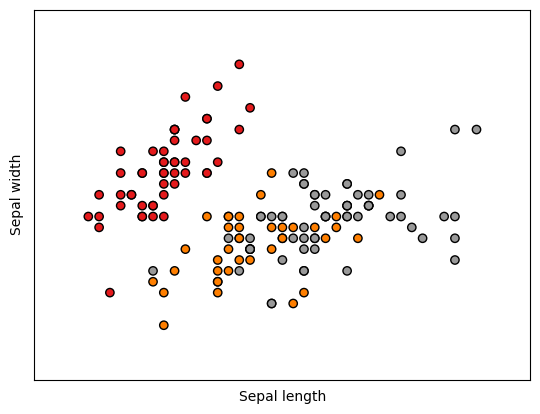

In [24]:
from sklearn.decomposition import PCA
# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

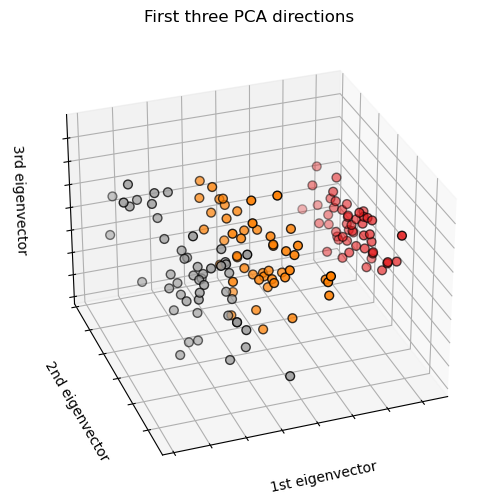

In [25]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris_data.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

---

## Partie 3 
### Pour aller plus loin

#### Données d'entraînement et de test
**Question :** <br>
Quel est l'avantage de diviser le jeu de données en données d'apprentissage et des données de test ? 

*Réponse* L'avantage de diviser le jeu de données en des données d'apprentissage et des données de tests est que cela nous permet de tester notre modèle avec des données que l'on possède déjà et surtout des données pour lesquels nous connaissons déjà les résultats attendu des tests.

**Question :** <br>
Quelle est la limite de la métode train_test_split sur la précision ? comment pallier à cette limite ? <br>
**Tips :** <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold">K-Folds cross-validation</a>, <a href="https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search">Grid Search</a> <br>

**Ressources**
* <a href="https://scikit-learn.org/stable/modules/cross_validation.html?highlight=cross_validation">Cross-validation scikit learn</a>
* <a href="https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85">Cross Validation Explained: Evaluating estimator performance.</a>
* <a href="http://www.xavierdupre.fr/app/papierstat/helpsphinx/notebooks/wines_knn_cross_val.html">Validation croisée</a>


*Réponse*

**Question :** Quels sont les paramètres de la classe *LogisticRegression* qui influencent la performance de l'algorithme ?  <br>
**Ressources** <br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregr#sklearn.linear_model.LogisticRegression">LogisticRegression</a> <br>


*Réponse*

**Question :** <br>
Créer les deux sous-ensemble de données d'apprentissage et de test en utilisant la technique de validation croisée. <br>
Stocker le résultat dans la variable *cv_sets*. <br>
Utiliser les paramètres suivants :
* $n\_splits$ = $10$
* $shuffle$ = $True$ 
* $random\_state$ = $42$ <br>
Tips : Utiliser la classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html?highlight=kfold#sklearn.model_selection.KFold">*KFold*</a> du package *sklearn.model-selection*

In [ ]:
from sklearn.model_selection import KFold
cv_sets = KFold(n_splits=10, shuffle=True, random_state=42)

#### Entraînement du modèle

##### Courbe d'apprentissage

**Question** : <br>
Qu'est ce que la courbre d'apprentissage ? <br>
**Ressource** : <a href="https://fr.qaz.wiki/wiki/Learning_curve_(machine_learning)">Courbe d'apprentissage</a>

*Réponse*

**Question** <br>
Tracer la courbe d'apprentissage du modèle de régression linéaire. 
<br>
**Ressource** : 
<a href="https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py">Plotting Learning Curves</a>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html">Learning Curve</a>

**Question** : <br>
Interpréter les graphiques 

## 